# <div  style="color:#303030;font-family:'arial blACK', sans-serif,monospace; text-align: center; padding: 50px 0; vertical-align:middle;" > <img src="https://github.com/PIA-Group/ScientIST-notebooks/blob/master/_Resources/Images/Lightbulb.png?raw=true" style=" background:#00a0e4;border-radius:10px;width:150px;text-align:left; margin-left:10%"  /> <span style="position:relative; bottom:70px; margin-left:5%"> OpenSignals for  Annotations </span> </div>

## <span style="color:#00a0e4;"> Keywords: </span>

```Open Signals```, ```HDF5 Files```, ```Annotations```

# I. Introduction
<br>
<div style="width:100%; background:#00a0e4;font-family:'arial black',monospace; text-align: center; padding: 7px 0; border-radius: 5px 50px;margin-top:-15px" >  </div>


## <div style="color:#00a0e4;"> 1. Background </div>


This notebook provides instructions to use the OpenSignals annotations software. The software can be used to anotate regions of interest/comments in the signals saved. e.g. annotating R-peaks from and ECG dataset.

## <div style="color:#00a0e4;"> 2. Objectives</div>
* Save an ecg.txt file in hdf5 format
* Use OpenSignals for annotations
* Import ecg signal and annotations made using the software
* Work with and manage HDF5 files

## <div style="color:#00a0e4;"> 3. Materials </div>
* OpenSignals_v4.0 (insert link to github repository)
* Install [HDFView](https://support.hdfgroup.org/products/java/release/download.html), to open HDF5 files

# II. Experimental
<br>
<div style="width:100%; background:#00a0e4;font-family:'arial black',monospace; text-align: center; padding: 7px 0; border-radius: 5px 50px;margin-top:-15px" >  </div>


## <div style="color:#00a0e4;">  1. Requirements </div>


In this section, the libraries required should be installed, using the command:

In [8]:
!pip install matplotlib >/dev/null 2>&1
!pip install numpy >/dev/null 2>&1
!pip install h5py >/dev/null 2>&1
!pip install json >/dev/null 2>&1


The system cannot find the path specified.
The system cannot find the path specified.
The system cannot find the path specified.
The system cannot find the path specified.


and imported:

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import h5py
import json

## <div style="color:#00a0e4;">  Step 1. Create HDF5 with the  subgroups and attributes</div>


- Create HDF5 file: inputs (name, sampling_rate, ecg signal)
- Create subgroups with ecg data
- Add atributes to the ecg dataset

In [21]:
name = "ecg.hdf5"
sampling_rate = 250;
ecg = np.genfromtxt('ecg.txt') 

hf = h5py.File(name, 'w')

# Create subgroups and add dataset
signals = hf.create_group('signals/ECG/raw')
ecg = signals.create_dataset('ecg',data = ecg)

# max and min for plot limits
ecg_max = max(ecg)
ecg_min = min(ecg)

# Add attributes
ecg.attrs.create('json','{"name": "signal0", "resolution": 16, "labels": ["I"], "units": {"signal": {"max": %f, "min": %f}, "time": {"label": "second"}}, "sampleRate": %d, "type": "/ECG/raw/ecg"}' %(ecg_max,ecg_min,sampling_rate))

hf.close()

After creating the file, open it using HDFView.\
The created file should look like this:

<img src="https://github.com/PIA-Group/ScientIST-notebooks/blob/master/_Resources/Images/A.Signal_Acquisition_IMG/a003/pre-opensignals.png?raw=true" width="200"/>


###  <div style="color:#00a0e4"> 1. Installing </div>
- Place folder with OpenSignals_v4.0 in the C:\\ folder and run the batch file "go.bat"

- Wait for package installation. The computer must be connected to the internet and the chrome version should be up to date

- The command prompt will open, do not close it while you are still working with OpenSignals

###  <div style="color:#00a0e4"> 2. Annotating </div>
- Open the "ecg.hdf5" (or any other ecg file in the HDF5 format ) by clicking in the folder icon

####  <div style="color:#00a0e4"> 2.1. Creating annotations </div>
- Select the "+" button in the top left corner

- Choose the letter you want to give to the annotations and click ok. You can follow [PhysioBank Annotations](https://archive.physionet.org/physiobank/annotations.shtml) for more information on annotation types

- Righ click to make annotations. Press Ctrl + Right click to remove annotations

- You can also create an annotation of a rhythm that prolongues in time, by dragging that region using the Right click. e.g annotating a noisy portion of the recording

- When the annotations are done, click the "check" icone

###  <div style="color:#00a0e4"> 3. Comments </div>
- Add comments in the comment section (bottom center). 

- In the comment section, should only be informations that are not present in the annotations. E.g. ventricular repolarization

### <div style="color:#00a0e4"> How to Unblock an ECG signal </div>
Sometimes the annotation tool breakes in two different ways:
  -  The programm freezes during annotation
  - After annotations, the HDF5 file cannot be opened again
    
This means that there was a problem with th HDF5 format and can be solved by:
  - Install [HDFView](https://support.hdfgroup.org/products/java/release/download.html), to open HDF5 file
  - Open the "ecg.hdf5" in HDFView
  - Search into the "events" folder, empty datasets (without info - 0)
  - Delete the empty dataset 

The file is now unlocked and can be used again by OpenSignals (this might result in you loosing the anootated timestamps )

## <div style="color:#00a0e4;"> Step 2. Open HDF5 with annotations </div>


After annotating with OpenSignals, the HDF5 file with subgroups: signals and events are automatically generated.
The created file should look like this:

<img src="https://github.com/PIA-Group/ScientIST-notebooks/blob/master/_Resources/Images/A.Signal_Acquisition_IMG/a003/pos-opensignals.png?raw=true" width="300"/>

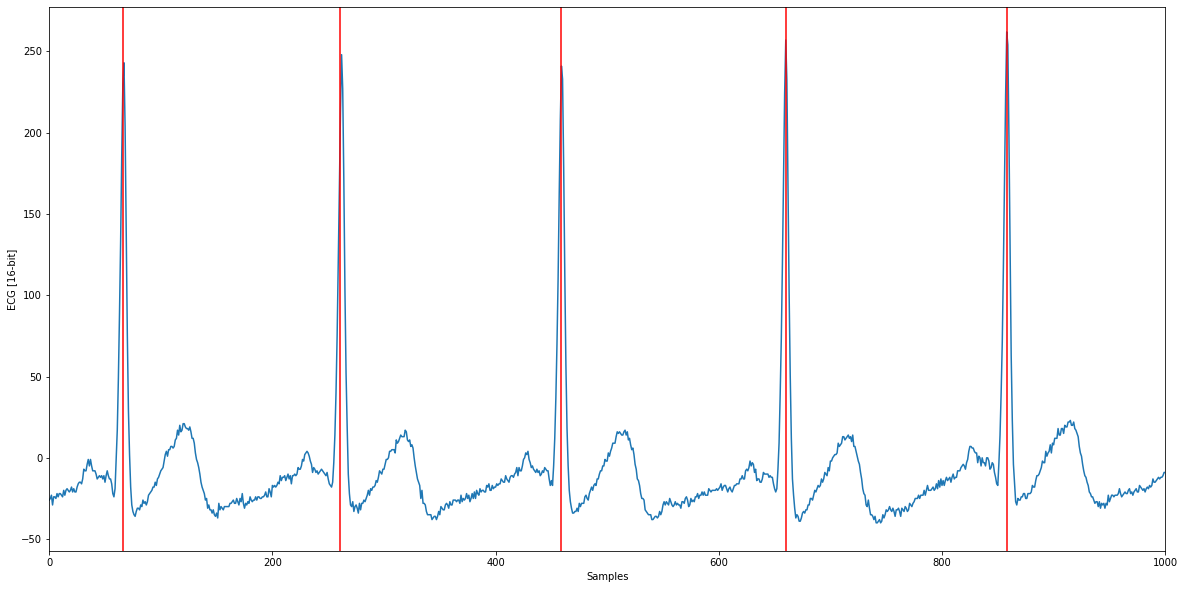

In [24]:
# OPEN hdf5 file
filename = 'ecg_anotated.hdf5'
f = h5py.File(filename,'r')


# Get ECG and timestamps from hdf5
#ECG
ecg = f['signals/ECG/raw/ecg'][:]

# R-peaks positions annotated (1st collumn)
timestamps = f['events/ECG/raw/ecg/N/timeStamps'][:,1]


# Plot 4 sec of data 
plt.figure(figsize=(20,10))
plt.plot(ecg)
xcoords = timestamps
for xc in xcoords:
    plt.axvline(x=xc,c='r')
plt.xlim(0,1000)
plt.xlabel('Samples')
plt.ylabel('ECG [16-bit]')

f.close()

# III. Explore
<br>
<div style="width:100%; background:#00a0e4;font-family:'arial black',monospace; text-align: center; padding: 7px 0; border-radius: 5px 50px;margin-top:-15px" >  </div>


<div style="height:100px; background:white;border-radius:10px;text-align:center"> 

<a> <img src="https://github.com/PIA-Group/ScientIST-notebooks/blob/master/_Resources/Images/IT.png?raw=true" alt="it" style=" bottom: 0; width:250px;
    display: inline;
    left: 250px;
    position: absolute;"/> </a>
<img src="https://github.com/PIA-Group/ScientIST-notebooks/blob/master/_Resources/Images/IST.png?raw=true"
         alt="alternate text" 
         style="position: relative;   width:250px; float: left;
    position: absolute;
    display: inline;
    bottom: 0;
    right: 100;"/>
</div> 

<div style="width: 100%; ">
<div style="background:#00a0e4;color:white;font-family:'arial', monospace; text-align: center; padding: 50px 0; border-radius:10px; height:10px; width:100%; float:left " >
<span style="font-size:12px;position:relative; top:-25px">  Please provide us your feedback <span style="font-size:14px;position:relative;COLOR:WHITE"> <a href="https://forms.gle/C8TdLQUAS9r8BNJM8">here</a>.</span></span> 
<br>
<span style="font-size:17px;position:relative; top:-20px">  Suggestions are welcome! </span> 
</div>

```Contributors: Tiago Rodrigues```